# PROJET ENERGIE - DATAVISUALISATION
**Objectifs** : Au moins 5 représentations graphiques construites à partir de votre jeu de données, visuelles et surtout pertinentes. Il faudra aussi accompagner votre travail d'analyses statistiques de qualité.
Pour chaque visualisation, j’attends :
Un commentaire précis, qui analyse la figure et apporte un avis “métier”.
Une validation du constat par des manipulations de données, ou un test statistique.

**Affichage du fichier de données :**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/ProjetEnergie/eco2mix-regional-cons-def.csv', sep=';')

df.head()

Mounted at /content/gdrive


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
0,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53,Bretagne,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32,Hauts-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75,Nouvelle-Aquitaine,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Suppression de la dernière colonne qui est vide :**

In [ ]:
df = df.drop(columns = 'Column 30')

**Suppression des 12 premières colonnes qui ne possèdent que des NaN :**

In [ ]:
import numpy as np
variables_numeriques = df.select_dtypes(include=['float']).columns
df = df.dropna(axis=0, how='all', subset=variables_numeriques)

**Suppression des valeurs manquantes pour les colonnes 'Nucléaire (MW)' et 'Eolien (MW)' :**

Si on ne passe pas ces valeurs manquantes en nombre, les calculs de production globale d'électricité sont impossibles. Ici, nous avons considéré les NaN comme une absence de production, c'est-à-dire zéro.

In [ ]:
df['Nucléaire (MW)'] = df['Nucléaire (MW)'].fillna(0)
df['Eolien (MW)'] = df['Eolien (MW)'].fillna(0)

**Graphique sur la consommation nationale :**

Quel est le record de consommation par jour en France ?  4300788 MW le 2018-02-28
Et la consommation par jour la plus basse enregistrée en France ?  1704114 MW le 2021-08-08


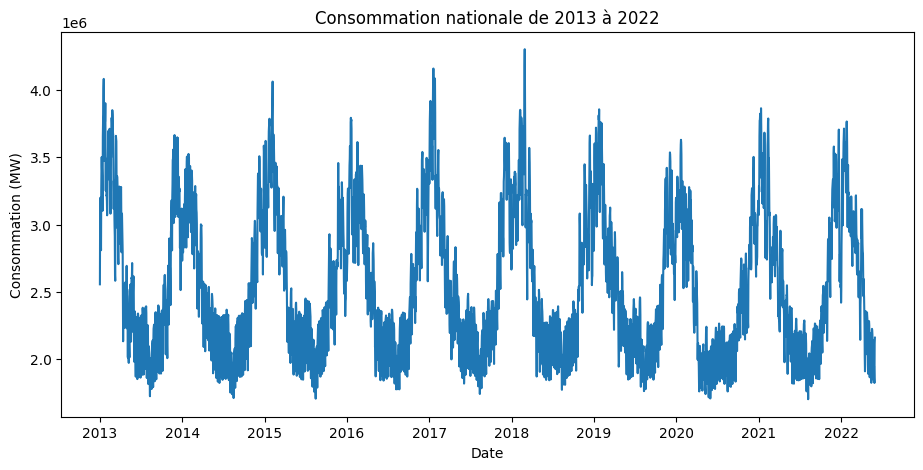

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

df['Date'] = pd.to_datetime(df['Date'], yearfirst=True)
conso_nat = df.groupby('Date').agg({'Consommation (MW)' : 'sum'})
conso_max = conso_nat.sort_values('Consommation (MW)', ascending=False)
conso_min = conso_nat.sort_values('Consommation (MW)', ascending=True)
print("Quel est le record de consommation par jour en France ? ",int(conso_max.max()[0]),'MW le',datetime.date(conso_max.index[0]))
print("Et la consommation par jour la plus basse enregistrée en France ? ",int(conso_min.min()[0]),'MW le',datetime.date(conso_min.index[0]))

plt.figure(figsize=(11,5))
sns.lineplot(x=conso_nat.index, y=conso_nat['Consommation (MW)'])
plt.title('Consommation nationale de 2013 à 2022');

**Graphique sur la production nationale :**

Quel est le record de production par jour en France ?  4211119 MW le 2015-02-06
Et la production par jour la plus basse enregistrée en France ?  1830637 MW le 2020-09-06


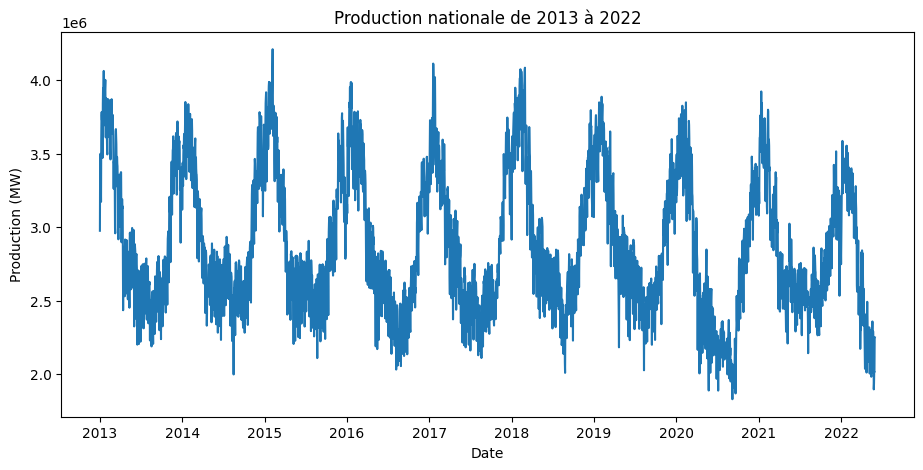

In [ ]:
df['Production (MW)'] = df['Thermique (MW)'] + df['Nucléaire (MW)'] + df['Eolien (MW)'] + df['Solaire (MW)'] + df['Hydraulique (MW)'] + df['Bioénergies (MW)']
prod_nat = df.groupby('Date').agg({'Production (MW)' : 'sum'})
prod_max = prod_nat.sort_values('Production (MW)', ascending=False)
prod_min = prod_nat.sort_values('Production (MW)', ascending=True)
print("Quel est le record de production par jour en France ? ",int(prod_max.max()[0]),'MW le',datetime.date(prod_max.index[0]))
print("Et la production par jour la plus basse enregistrée en France ? ",int(prod_min.min()[0]),'MW le',datetime.date(prod_min.index[0]))

plt.figure(figsize=(11,5))
sns.lineplot(x=prod_nat.index, y=prod_nat['Production (MW)'])
plt.title('Production nationale de 2013 à 2022');

**Le graphique final qui peut être intégré :**

On observe en premier lieu que consommation et production d'énergie sont liées. Plus les habitants consomment, plus le pays produit de l'électricité.

Ce graphique permet aussi d'appréhender la saisonnalité du couple production-consommation d'énergie. En hiver, les Français consomment plus, notamment à cause du chauffage, en conséquence la production d'électricité est plus importante. L'été, le constat est inversé : la population consomme moins, donc la France produit moins.

On remarque enfin que la production d'électricité est en baisse durant l'été 2020 et durant l'hiver 2022, tandis que la consommation se maintient à peu près au même niveau, chaque année.

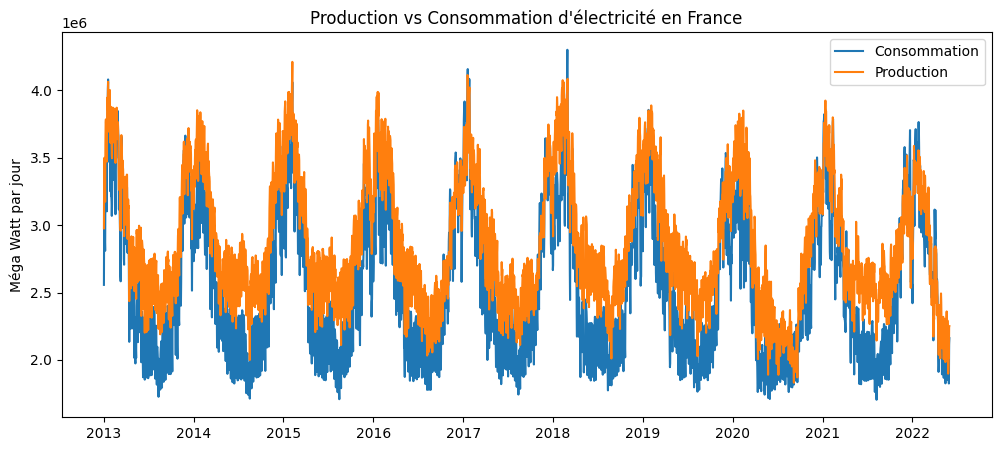

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x=conso_nat.index, y=conso_nat['Consommation (MW)'], label='Consommation')
sns.lineplot(x=prod_nat.index, y=prod_nat['Production (MW)'], label='Production')
plt.ylabel('Méga Watt par jour')
plt.xlabel('')
plt.legend()
plt.title('Production vs Consommation d\'électricité en France');

**Un graphique sur les filières de production d'électricité :**

Sur ce graphique, on remarque que la principale source de production d'électricité en France est le nucléaire. Le nucléaire représente 72 % de la production d'énergie de notre pays sur la période étudiée. Viennent ensuite la production hydraulique et la production thermique.

On observe également que la part de la production nucléaire baisse, tandis que celles des énergies renouvelables augmentent entre 2013 et 2021. Comme vu sur le graphique précédent, la production a particulièrement baissée durant l'été 2020.

Attention, nous ne pouvons pas nous fier à la colonne 2022, car le dataset s'arrête au mois de mai 2022.

<Figure size 1100x500 with 0 Axes>

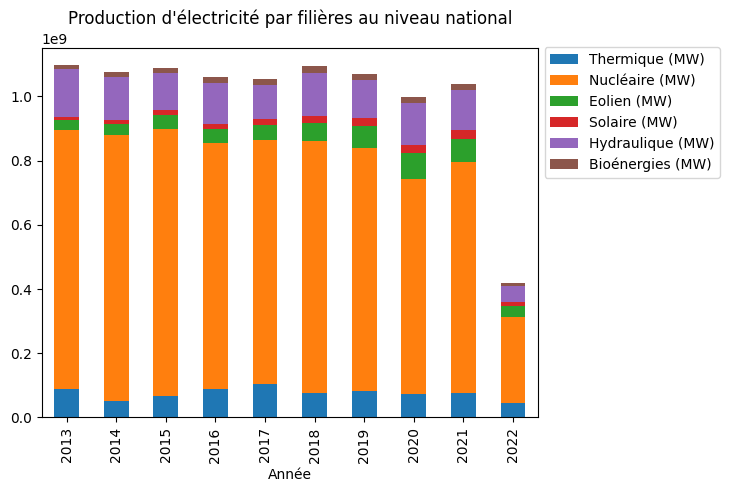

In [ ]:
prod_energie = df.groupby('Date').agg({'Thermique (MW)' : 'sum', 'Nucléaire (MW)' : 'sum', 'Eolien (MW)' : 'sum',
                                       'Solaire (MW)' : 'sum', 'Hydraulique (MW)' : 'sum', 'Bioénergies (MW)' : 'sum'})
prod_energie = prod_energie.reset_index()
prod_energie['Année'] = prod_energie['Date'].astype(str).str[:-6]
prod_energie_an = prod_energie.groupby('Année').agg({'Thermique (MW)' : 'sum', 'Nucléaire (MW)' : 'sum', 'Eolien (MW)' : 'sum',
                                  'Solaire (MW)' : 'sum', 'Hydraulique (MW)' : 'sum', 'Bioénergies (MW)' : 'sum'})
prod_energie_an = prod_energie_an.reset_index()
#display(prod_energie_an)

plt.figure(figsize=(11,5))
prod_energie_an.plot.bar(x='Année', y=['Thermique (MW)','Nucléaire (MW)','Eolien (MW)','Solaire (MW)','Hydraulique (MW)',
                                       'Bioénergies (MW)'], stacked=True)
plt.legend(bbox_to_anchor = (1,1.02))
plt.title('Production d\'électricité par filières au niveau national');

In [ ]:
taux_energie = pd.DataFrame(prod_energie_an.sum(), columns=["Production"])
taux_energie = taux_energie.drop(taux_energie.index[0])
taux_energie['Taux'] = taux_energie["Production"] / taux_energie["Production"].sum() * 100
display(taux_energie)

,Production,Taux
Thermique (MW),749236063.0,7.498033
Nucléaire (MW),7199685295.0,72.051358
Eolien (MW),507890325.0,5.082748
Solaire (MW),182125095.0,1.82263
Hydraulique (MW),1188485880.0,11.893856
Bioénergies (MW),165012645.0,1.651376


**Focus sur les énergies renouvelables :**

Sur ce focus, qui vient compléter le graphique précédent, on observe que la part des énergies renouvelables dans la production d'électricité en France a augmenté de près de 5% entre 2013 et 2021, et cela au détriment de la production nucléaire.

Dans les énergies renouvelables, nous regroupons : l'éolien, le solaire, l'hydraulique et les bioénergies. Et pour rappel, voici la définition des bioénergies : cette filière comprend les biogaz, les biocombustibles solides (bois énergie et autres biocombustibles solides) et les déchets (ménagers et papetiers).

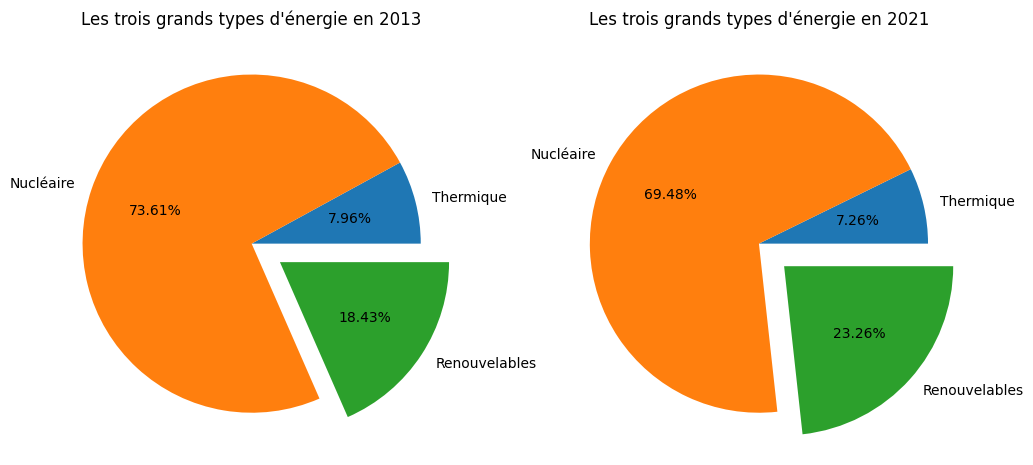

In [ ]:
prod_energie_an_2013 = prod_energie_an[prod_energie_an['Année'] == '2013']
prod_energie_an_2013 = prod_energie_an_2013.drop(columns='Année')
prod_energie_an_2013['Energies renouvelables (MW)'] = prod_energie_an_2013['Hydraulique (MW)'] + prod_energie_an_2013['Eolien (MW)'] + prod_energie_an_2013['Solaire (MW)'] + prod_energie_an_2013['Bioénergies (MW)']
prod_energie_an_2013 = prod_energie_an_2013.drop(columns=['Hydraulique (MW)','Eolien (MW)','Solaire (MW)','Bioénergies (MW)'])

prod_energie_an_2021 = prod_energie_an[prod_energie_an['Année'] == '2021']
prod_energie_an_2021 = prod_energie_an_2021.drop(columns='Année')
prod_energie_an_2021['Energies renouvelables (MW)'] = prod_energie_an_2021['Hydraulique (MW)'] + prod_energie_an_2021['Eolien (MW)'] + prod_energie_an_2021['Solaire (MW)'] + prod_energie_an_2021['Bioénergies (MW)']
prod_energie_an_2021 = prod_energie_an_2021.drop(columns=['Hydraulique (MW)','Eolien (MW)','Solaire (MW)','Bioénergies (MW)'])

plt.figure(figsize=(12,8))

plt.subplot(122)
plt.pie(prod_energie_an_2021.iloc[0,], labels=['Thermique', 'Nucléaire', 'Renouvelables'], autopct='%.2f%%', explode=[0,0,0.2])
plt.title("Les trois grands types d'énergie en 2021");

plt.subplot(121)
plt.pie(prod_energie_an_2013.iloc[0,], labels=['Thermique', 'Nucléaire', 'Renouvelables'], autopct='%.2f%%', explode=[0,0,0.2])
plt.title("Les trois grands types d'énergie en 2013");

**Zoom par mois :**

On observe que la production nationale d'électricité semble toujours supérieure à la consommation. Nous savons que la France vend notamment de l'énergie à ses voisins. De plus, les différences saisonnières de consommation et de production sont bien visibles ici.

On peut également en déduire que le pays adapte sa production d'électricité aux besoins de ses habitants. Tandis que les énergies renouvelables ont une production à peu près stable sur les différents mois de l'année, c'est la production d'énergie nucléaire (ou thermique) qui permet cette adaptabilité.

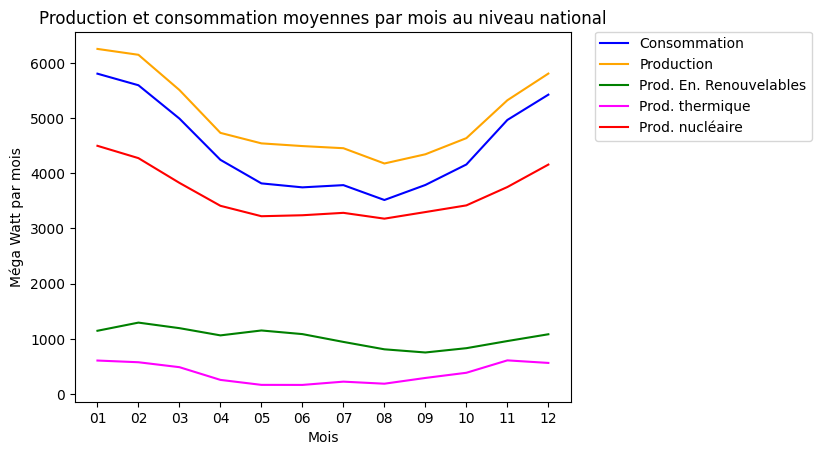

In [ ]:
df_simplifie = df.drop(columns=['Nature', 'Date - Heure', 'Pompage (MW)', 'Ech. physiques (MW)', 'Stockage batterie',
       'Déstockage batterie', 'Eolien terrestre', 'Eolien offshore',
       'TCO Thermique (%)', 'TCH Thermique (%)', 'TCO Nucléaire (%)',
       'TCH Nucléaire (%)', 'TCO Eolien (%)', 'TCH Eolien (%)',
       'TCO Solaire (%)', 'TCH Solaire (%)', 'TCO Hydraulique (%)',
       'TCH Hydraulique (%)', 'TCO Bioénergies (%)', 'TCH Bioénergies (%)'])
df_simplifie['Energies renouvelables (MW)'] = df_simplifie['Hydraulique (MW)'] + df_simplifie['Eolien (MW)'] + df_simplifie['Solaire (MW)'] + df_simplifie['Bioénergies (MW)']
df_simplifie['Mois'] = df_simplifie['Date'].astype(str).str[5:-3]

energie_mois = df_simplifie.groupby('Mois').agg({'Consommation (MW)' : 'mean', 'Thermique (MW)' : 'mean', 'Nucléaire (MW)' : 'mean',
                                                 'Eolien (MW)' : 'mean', 'Solaire (MW)' : 'mean', 'Hydraulique (MW)' : 'mean',
                                                 'Bioénergies (MW)' : 'mean', 'Production (MW)' : 'mean',
                                                 'Energies renouvelables (MW)' : 'mean'})
energie_mois = energie_mois.reset_index()

sns.lineplot(data=energie_mois, y='Consommation (MW)', x='Mois', color='blue', label='Consommation')
sns.lineplot(data=energie_mois, y='Production (MW)', x='Mois', color='orange', label='Production')
sns.lineplot(data=energie_mois, y='Energies renouvelables (MW)', x='Mois', color='green', label='Prod. En. Renouvelables')
sns.lineplot(data=energie_mois, y='Thermique (MW)', x='Mois', color='magenta', label='Prod. thermique')
sns.lineplot(data=energie_mois, y='Nucléaire (MW)', x='Mois', color='red', label='Prod. nucléaire')
plt.legend(bbox_to_anchor = (1.5,1.02))
plt.ylabel('Méga Watt par mois')
plt.title('Production et consommation moyennes par mois au niveau national');

**Zoom par jours de la semaine et par horaires :**

On observe que le couple consommation-production dépend également des jours de la semaine. Ainsi, la France consomme moins d'électricité les week-ends et particulièrement le dimanche. Cela peut s'expliquer par le fait que le dimanche est pour la majorité des Français un jour non travaillé et par conséquent de nombreuses entreprises sont à l'arrêt, consommant moins.

Sans surprise également, les pics de consommation-production se situent entre 11h et 13h, puis entre 19h et 20h. En revanche, les horaires où la France consomme le moins sont entre 4h et 5h, le matin.

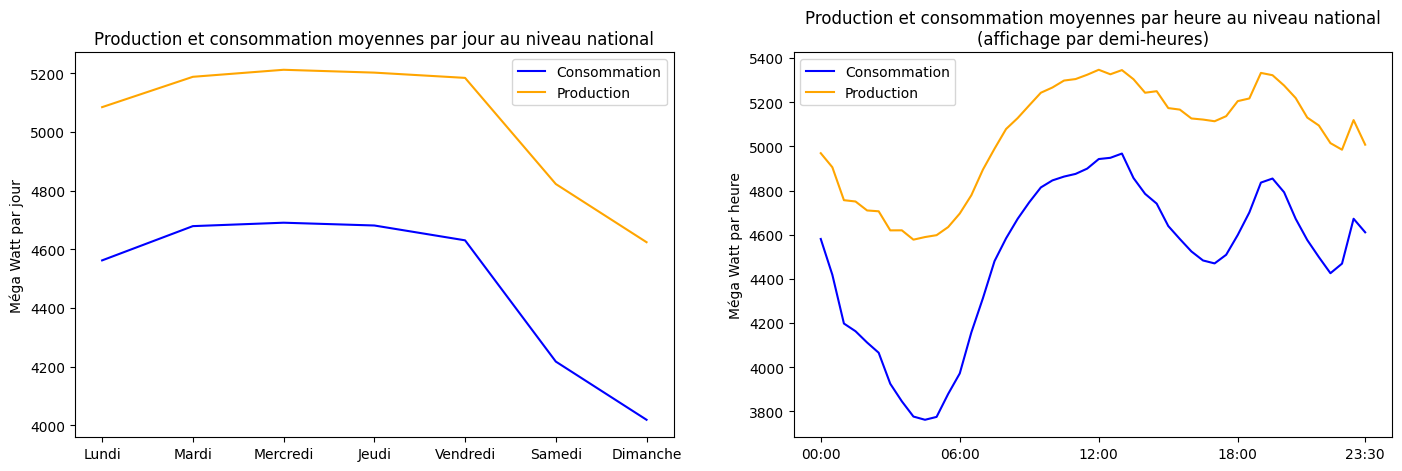

In [ ]:
df_simplifie['Jour'] = df_simplifie['Date'].dt.weekday
energie_jour = df_simplifie.groupby('Jour').agg({'Consommation (MW)' : 'mean', 'Thermique (MW)' : 'mean', 'Nucléaire (MW)' : 'mean',
                                                 'Eolien (MW)' : 'mean', 'Solaire (MW)' : 'mean', 'Hydraulique (MW)' : 'mean',
                                                 'Bioénergies (MW)' : 'mean', 'Production (MW)' : 'mean',
                                                 'Energies renouvelables (MW)' : 'mean'})
energie_jour = energie_jour.reset_index()

energie_heure = df_simplifie.groupby('Heure').agg({'Consommation (MW)' : 'mean', 'Thermique (MW)' : 'mean',
                                                   'Nucléaire (MW)' : 'mean', 'Eolien (MW)' : 'mean', 'Solaire (MW)' : 'mean',
                                                   'Hydraulique (MW)' : 'mean', 'Bioénergies (MW)' : 'mean',
                                                   'Production (MW)' : 'mean', 'Energies renouvelables (MW)' : 'mean'})
energie_heure = energie_heure.reset_index()

plt.figure(figsize=(17,5))

plt.subplot(121)
sns.lineplot(data=energie_jour, y='Consommation (MW)', x='Jour', color='blue', label='Consommation')
sns.lineplot(data=energie_jour, y='Production (MW)', x='Jour', color='orange', label='Production')
plt.ylabel('Méga Watt par jour')
plt.xlabel('')
plt.xticks(np.arange(7), ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])
plt.title('Production et consommation moyennes par jour au niveau national');

plt.subplot(122)
sns.lineplot(data=energie_heure, y='Consommation (MW)', x='Heure', color='blue', label='Consommation')
sns.lineplot(data=energie_heure, y='Production (MW)', x='Heure', color='orange', label='Production')
plt.ylabel('Méga Watt par heure')
plt.xlabel('')
plt.xticks(['00:00','06:00','12:00','18:00','23:30'])
plt.title('Production et consommation moyennes par heure au niveau national\n(affichage par demi-heures)');

**Hypothèse de linéarité entre Production et Consommation :**

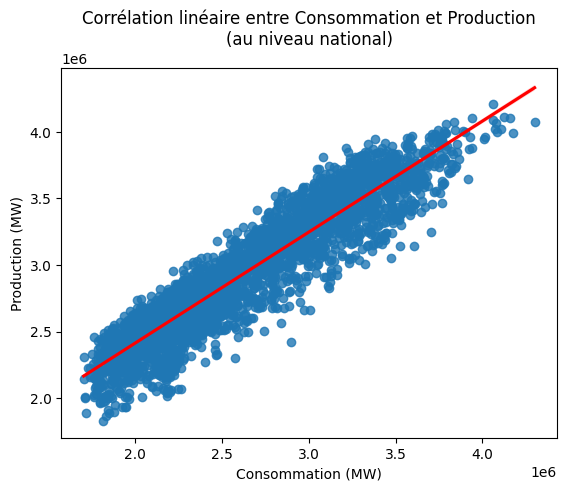

In [ ]:
df_gb_date = df.groupby('Date').agg({'Production (MW)' : 'sum', 'Consommation (MW)' : 'sum'})
sns.regplot(x='Consommation (MW)', y='Production (MW)', data=df_gb_date, line_kws={"color": "red"})
plt.title('Corrélation linéaire entre Consommation et Production\n(au niveau national)');

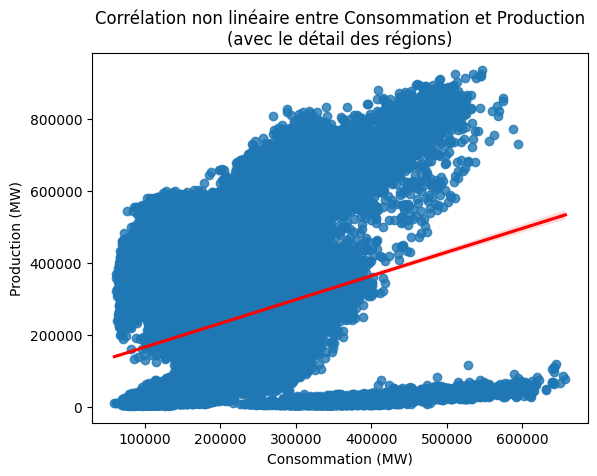

In [ ]:
df_gb_date_lieu = df.groupby(['Date','Code INSEE région']).agg({'Production (MW)' : 'sum', 'Consommation (MW)' : 'sum'})
sns.regplot(x='Consommation (MW)', y='Production (MW)', data=df_gb_date_lieu, line_kws={"color": "red"})
plt.title('Corrélation non linéaire entre Consommation et Production\n(avec le détail des régions)');

**Zoom sur les régions :**
On remarque que la région Auvergne-Rhône-Alpes est la région la plus productrice d'énergie nucléaire, on recense sur cette région 3 des 8 plus grandes centrales nucléaires de l'hexagone. Nous constatons que 3 autres régions sont très productrices d'énergie nucléaire, le Grand Est, le Centre Val de Loire et la Normandie avec 2 à 3 centrales nucléaires par région évoquée. Enfin, nous observons que 5 régions ne produisent pas d'énergie nucléaire (Bourgogne-Franche-Comté, Bretagne, Pays de la Loire, Ile de France, Provence-Alpes-Côte d'Azur).

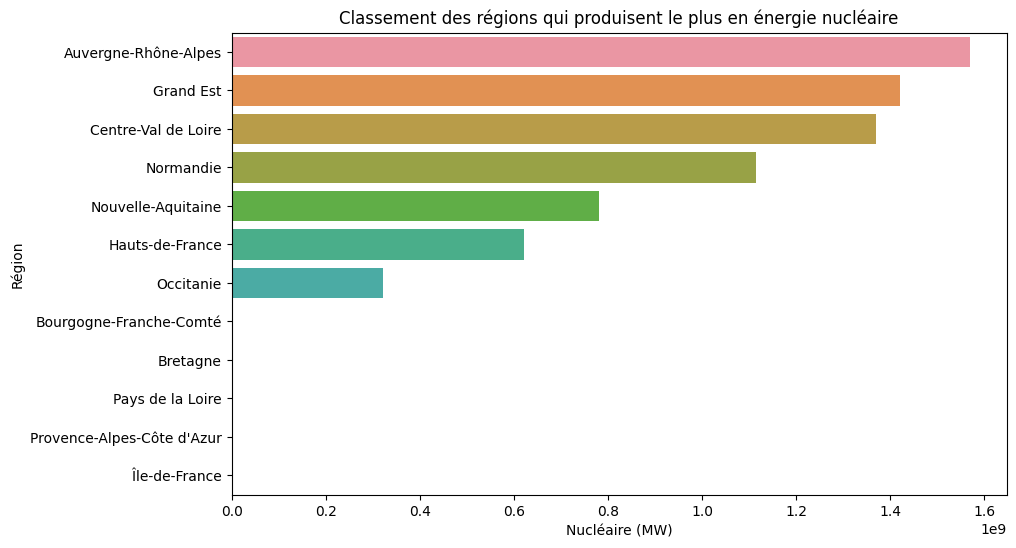

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
nucleaire_reg = df.groupby('Région').agg({'Nucléaire (MW)' : 'sum'})
nucleaire_reg_max = nucleaire_reg.sort_values('Nucléaire (MW)', ascending=False)
sns.barplot(y = nucleaire_reg_max.index, x = nucleaire_reg_max['Nucléaire (MW)'])

plt.title('Classement des régions qui produisent le plus en énergie nucléaire')

plt.show();

In [ ]:
df.groupby('Région')['Nucléaire (MW)'].max()

Région
Auvergne-Rhône-Alpes          13632.0
Bourgogne-Franche-Comté           0.0
Bretagne                          0.0
Centre-Val de Loire           11767.0
Grand Est                     12609.0
Hauts-de-France                5532.0
Normandie                     10483.0
Nouvelle-Aquitaine             6781.0
Occitanie                      2632.0
Pays de la Loire                  0.0
Provence-Alpes-Côte d'Azur        0.0
Île-de-France                     0.0
Name: Nucléaire (MW), dtype: float64

La région la plus productrice d'énergie renouvelable est la région Auvergne-Rhône-Alpes avec plus de 50% de production (en MW) que tout autre région, notamment grâce à l'énergie hydraulique. En suivant, nous observons que 2 régions sont sur des valeurs équivalentes, l'Occitanie et le Grand-Est, pour la première grâce à la production d'énergie hydraulique et solaire, pour le second grâce au développement de plusieurs types d'énergie renouvelable. Enfin, nous retrouvons des régions qui produisent très peu d'énergie renouvelables en
comparaison avec celles évoquées, la Bourgogne-Franche-Comté, la Bretagne, le Centre Val de Loire, les Pays de la Loire, l'Ile de France et la Normandie.

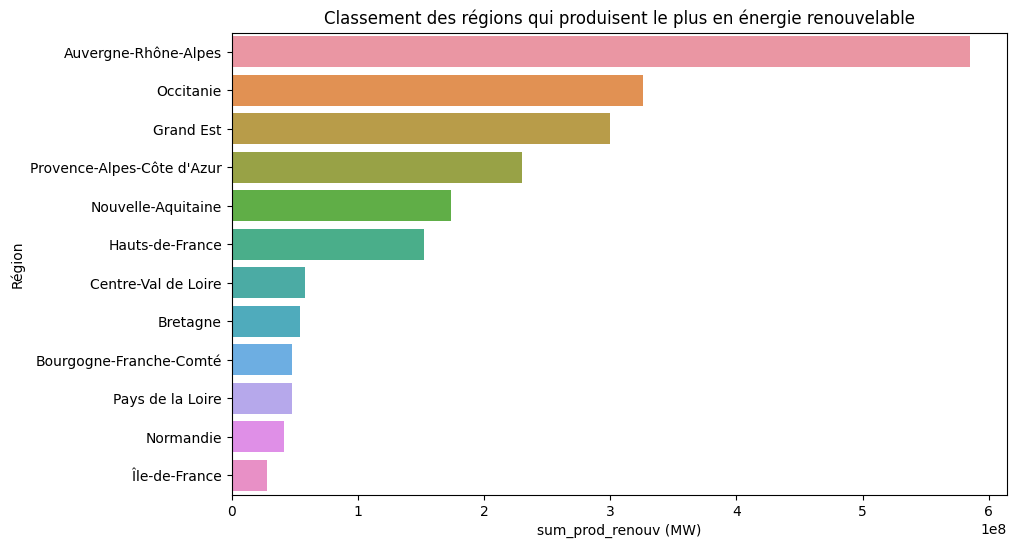

In [ ]:
plt.figure(figsize = (10,6))
df['sum_prod_renouv (MW)'] = df['Eolien (MW)'] + df['Solaire (MW)'] + df['Hydraulique (MW)'] + df['Bioénergies (MW)']
nucleaire_reg = df.groupby('Région').agg({'sum_prod_renouv (MW)' : 'sum'})
nucleaire_reg_max = nucleaire_reg.sort_values('sum_prod_renouv (MW)', ascending=False)
sns.barplot(y = nucleaire_reg_max.index, x = nucleaire_reg_max['sum_prod_renouv (MW)'])

plt.title('Classement des régions qui produisent le plus en énergie renouvelable')

plt.show();

In [ ]:
df.groupby('Région')['sum_prod_renouv (MW)'].max()

Région
Auvergne-Rhône-Alpes          9124.0
Bourgogne-Franche-Comté       1257.0
Bretagne                      1367.0
Centre-Val de Loire           1581.0
Grand Est                     5588.0
Hauts-de-France               5166.0
Normandie                     1038.0
Nouvelle-Aquitaine            3992.0
Occitanie                     5555.0
Pays de la Loire              1385.0
Provence-Alpes-Côte d'Azur    3439.0
Île-de-France                  380.0
Name: sum_prod_renouv (MW), dtype: float64